In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('public_data_waste_fee.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      4341 non-null   object 
 1   province    4341 non-null   object 
 2   name        4335 non-null   object 
 3   tc          4341 non-null   float64
 4   cres        4289 non-null   float64
 5   csor        4274 non-null   float64
 6   istat       4341 non-null   int64  
 7   area        4335 non-null   float64
 8   pop         4341 non-null   int64  
 9   alt         4335 non-null   float64
 10  isle        4335 non-null   float64
 11  sea         4335 non-null   float64
 12  pden        4335 non-null   float64
 13  wden        4335 non-null   float64
 14  urb         4335 non-null   float64
 15  fee         4341 non-null   object 
 16  d_fee       4341 non-null   int64  
 17  sample      4341 non-null   int64  
 18  organic     3829 non-null   float64
 19  paper       4316 non-null  

In [4]:
df.isna().sum()

region           0
province         0
name             6
tc               0
cres            52
csor            67
istat            0
area             6
pop              0
alt              6
isle             6
sea              6
pden             6
wden             6
urb              6
fee              0
d_fee            0
sample           0
organic        512
paper           25
glass           33
wood          1095
metal          246
plastic         39
raee           314
texile        1013
other          136
msw_so           0
msw_un           0
msw              0
sor              0
geo            285
roads          443
s_wteregio     285
s_landfill     285
gdp            386
proads         443
wage           285
finance        386
dtype: int64

In [5]:
df.shape

(4341, 39)

In [6]:
df.corr()

,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
tc,1.000000,0.641356,0.456839,0.058043,0.166236,0.070922,0.034131,0.206621,0.348404,-0.003275,...,0.081150,-0.240091,-0.170417,0.075422,-0.218948,0.124757,0.425476,-0.126651,-0.083039,0.425476
cres,0.641356,1.000000,0.040572,0.070117,0.082336,0.016436,0.173686,0.167832,0.255214,-0.053204,...,0.026702,-0.468570,-0.169306,0.033756,-0.179085,0.133023,0.400337,-0.234037,-0.175329,0.400337
csor,0.456839,0.040572,1.000000,0.072811,0.062664,0.026035,-0.072067,0.065903,0.190112,-0.006064,...,0.032608,0.158001,-0.130705,0.032577,-0.144340,0.037236,0.203540,0.004510,-0.033998,0.203540
istat,0.058043,0.070117,0.072811,1.000000,0.168440,0.016016,0.075292,0.049904,0.214556,-0.008727,...,0.007146,-0.189709,-0.669656,0.091876,-0.288023,0.515940,0.192090,-0.086878,-0.495801,0.192090
area,0.166236,0.082336,0.062664,0.168440,1.000000,0.417707,0.097347,-0.013062,0.101976,-0.146079,...,0.419941,-0.133355,-0.202015,0.399065,-0.251473,0.252172,0.169670,-0.104307,-0.085723,0.169670
pop,0.070922,0.016436,0.026035,0.016016,0.417707,1.000000,-0.103749,-0.004462,0.102309,0.282960,...,0.993305,-0.048039,-0.029918,0.471932,-0.030841,0.013248,0.028322,0.165039,0.060720,0.028322
alt,0.034131,0.173686,-0.072067,0.075292,0.097347,-0.103749,1.000000,-0.058633,-0.268126,-0.254323,...,-0.098950,-0.256272,-0.150481,-0.004264,-0.018542,0.162473,0.466086,-0.484688,-0.162980,0.466086
isle,0.206621,0.167832,0.065903,0.049904,-0.013062,-0.004462,-0.058633,1.000000,0.150038,0.016243,...,-0.001184,-0.043946,-0.072029,-0.002492,-0.024675,0.031293,0.047803,-0.004444,-0.037604,0.047803
sea,0.348404,0.255214,0.190112,0.214556,0.101976,0.102309,-0.268126,0.150038,1.000000,0.124959,...,0.098833,-0.148196,-0.313929,0.076188,-0.348988,0.266369,0.125317,0.124105,-0.256310,0.125317
pden,-0.003275,-0.053204,-0.006064,-0.008727,-0.146079,0.282960,-0.254323,0.016243,0.124959,1.000000,...,0.248073,0.046718,0.005440,0.042268,0.165778,-0.161083,-0.191937,0.514109,0.097563,-0.191937


In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

<AxesSubplot:>

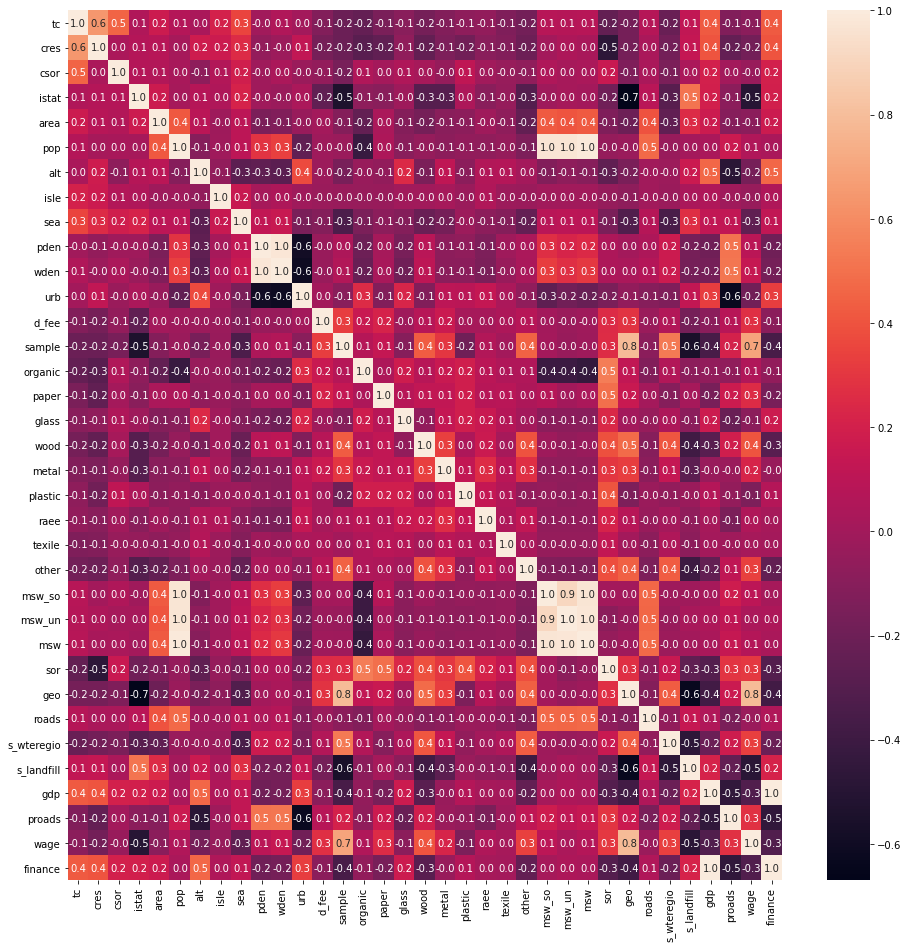

In [9]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

In [10]:
df.describe()

,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
count,4341.000000,4289.000000,4274.000000,4341.000000,4335.000000,4.341000e+03,4335.000000,4335.000000,4335.000000,4335.000000,...,4.341000e+03,4341.000000,4056.000000,3898.000000,4056.000000,4056.000000,3955.000000,3898.000000,4056.000000,3955.000000
mean,154.235761,54.179839,52.683058,47469.933195,40.995045,1.020384e+04,310.052134,0.005075,0.168397,405.048252,...,5.311340e+06,66.237153,2.290804,101.931121,21.867460,20.000860,7.231159,4.253962,9.446968,7.448094
std,76.069005,43.191121,33.063610,30089.798169,56.784025,5.342640e+04,280.534306,0.071066,0.374261,771.211960,...,3.254404e+07,17.730843,0.887611,309.985865,15.624688,21.371373,0.550041,1.155765,0.298122,0.566542
min,25.690001,4.270000,3.390000,1272.000000,0.120000,3.400000e+01,1.000000,0.000000,0.000000,2.479942,...,1.997200e+04,0.250000,1.000000,1.000000,0.000000,3.602713,6.035401,-3.366593,7.865574,6.216463
25%,108.040001,27.340000,31.252500,18135.000000,10.850000,1.579000e+03,80.000000,0.000000,0.000000,62.588707,...,6.116750e+05,57.830000,1.000000,25.000000,8.904969,4.551430,6.811210,3.497756,9.226408,7.015546
50%,136.619995,41.689999,48.875000,42015.000000,22.730000,3.535000e+03,240.000000,0.000000,0.000000,151.323624,...,1.524449e+06,70.840000,3.000000,51.000000,24.467649,11.296785,7.128087,4.356210,9.522799,7.341930
75%,179.160004,66.489998,66.435001,70049.000000,47.490002,8.199000e+03,459.000000,0.000000,0.000000,399.364822,...,3.954080e+06,79.090000,3.000000,105.000000,38.501492,31.493038,7.571133,5.075414,9.665145,7.798267
max,977.419983,670.320007,582.159973,111107.000000,1287.390015,2.617175e+06,1816.000000,1.000000,1.000000,12122.826172,...,1.691887e+09,97.480000,3.000000,14970.000000,65.122093,92.531860,10.538720,8.980027,10.484852,10.854882


# Data Preparation

- fill na with default value or drop na?
- remove outlier with IQR

In [11]:
# make a copy of original dataset
df_copy = df.copy()

In [12]:
# list useless variables that need to be removed
drop_vars = ['region','province','name', 'istat', 'cres', 'csor']
# list variables that need to do one-hot encoding
onehot_vars = ['fee', 'isle', 'sea', 'urb', 'geo']
cat_vars = drop_vars + onehot_vars

numerical_columns = [e for e in df_copy.columns if e not in cat_vars]

### Fillna

In [13]:
# fill navalue flag
fillna = True

def fillna():
    # fill numerical na with mean value
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    # fill categorical na with most frequncy
    df[cat_vars] = df[cat_vars].apply(lambda x: x.fillna(x.value_counts().index[0]))

fillna() if fillna else df.dropna()

### Fix types

In [14]:
# fix the type error
df.isle = df.isle.astype('int64')
df.sea = df.sea.astype('int64')
df.urb = df.urb.astype('int64')
df.geo = np.where(df.geo==1, 'South', np.where(df.geo==2,'Center','North'))

### Onehot encoding

In [15]:
# build final dataset
non_cat_df = df.drop(cat_vars, axis=1)
cat_df = df.loc[:,df.columns.isin(onehot_vars)]
onehot = pd.get_dummies(cat_df, drop_first=True)
df_encoding = pd.concat([non_cat_df, onehot], axis=1)

### Remove Outlier

<font color='red'>The performances of both models are bad after removing outliers</font>

In [16]:
# # Removing the outliers


# def calculateRange(data, col):
#     Q3 = np.quantile(data[col], 0.75)
#     Q1 = np.quantile(data[col], 0.25)
#     IQR = Q3 - Q1    
#     lower_range = Q1 - 1.5 * IQR
#     upper_range = Q3 + 1.5 * IQR
#     return lower_range, upper_range

# if False:
#     print("before removing outlier, shape is {}".format(df_encoding.shape))
#     for c in numerical_columns:
#         lower_range, upper_range = calculateRange(df_encoding, c)
#         df_encoding = df_encoding.loc[df_encoding[c].between(lower_range, upper_range)]

#     print("after removing outlier, shape is {}".format(df_encoding.shape))

### Split X&y

In [17]:
X = df_encoding.drop(['tc'], axis=1)
y = df_encoding.tc

In [18]:
X.head()

,area,pop,alt,pden,wden,d_fee,sample,organic,paper,glass,...,gdp,proads,wage,finance,isle,sea,urb,fee_STANDARD,geo_North,geo_South
0,283.750000,22648,1.0,79.816742,119671.476562,1,1,22.275126,4.363508,3.592508,...,7.269942,4.354818,9.438692,7.488041,0,1,2,0,1,0
1,34.439999,4952,1.0,143.786301,70030.984375,1,1,35.040904,9.887817,9.518352,...,7.109984,6.082588,9.510139,7.323284,0,1,3,0,1,0
2,26.620001,3895,1.0,146.318558,81116.523438,1,1,37.377010,11.991079,6.653014,...,7.267856,4.335555,8.891356,7.485891,0,1,3,0,1,0
3,84.300003,7140,1.0,84.697502,43320.460938,1,1,45.310474,9.762878,7.551381,...,7.085936,3.710479,9.433685,7.298514,0,1,3,0,1,0
4,35.700001,12193,1.0,341.540619,201565.265625,0,0,0.428440,6.601569,4.334883,...,7.247444,5.274037,9.125561,7.464867,0,1,2,1,0,1


In [19]:
y.head()

0    502.250000
1    228.050003
2    268.010010
3    199.089996
4    233.639999
Name: tc, dtype: float64

# Pick top 10 important features with RandomForest First

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rd = RandomForestRegressor(random_state=0)

rd.fit(X, y)

importance_df = pd.DataFrame(list(zip(list(X.columns), rd.feature_importances_)),  
                             columns=['feature', 'importance'])

top10features = importance_df.nlargest(10, 'importance')
top10features

,feature,importance
23,gdp,0.115504
28,sea,0.110400
26,finance,0.100995
25,wage,0.082836
3,pden,0.060144
1,pop,0.056986
17,msw_un,0.041724
2,alt,0.039364
4,wden,0.029743
9,glass,0.028658


In [22]:
X_top10 = X.loc[:, X.columns.isin(top10features.feature)]

In [23]:
X_top10.head()

,pop,alt,pden,wden,glass,msw_un,gdp,wage,finance,sea
0,22648,1.0,79.816742,119671.476562,3.592508,13560520,7.269942,9.438692,7.488041,1
1,4952,1.0,143.786301,70030.984375,9.518352,580460,7.109984,9.510139,7.323284,1
2,3895,1.0,146.318558,81116.523438,6.653014,464400,7.267856,8.891356,7.485891,1
3,7140,1.0,84.697502,43320.460938,7.551381,770860,7.085936,9.433685,7.298514,1
4,12193,1.0,341.540619,201565.265625,4.334883,4169180,7.247444,9.125561,7.464867,1


# KNN Regression

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_top10, y, test_size=0.2, random_state=10086)

In [26]:
knn_param = {'n_neighbors':list(range(2, 100))}

knn_cv = GridSearchCV(KNeighborsRegressor(), knn_param, cv=10)

knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [27]:
knn_cv.best_params_

{'n_neighbors': 72}

In [28]:
knn_model = knn_cv.best_estimator_
knn_pred = knn_model.predict(X_test)

In [29]:
mean_squared_error(y_test, knn_pred)

5019.237365809607

In [30]:
r2_score(y_test, knn_pred)

0.07679781062836011

# Decision Tree Regression

In [31]:
dec_param = {'max_depth': list(range(1,10))}
dec_cv = GridSearchCV(DecisionTreeRegressor(random_state=0), dec_param, cv=10)
dec_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [32]:
dec_cv.best_params_

{'max_depth': 4}

In [33]:
dec_cv.best_score_

0.24147205894267518

In [34]:
dec_model = dec_cv.best_estimator_
dec_pred = dec_model.predict(X_test)

In [35]:
mean_squared_error(y_test, dec_pred)

4131.603415137332

In [36]:
r2_score(y_test, dec_pred)

0.24006277438626789

## Pruning branches

In [37]:
path = dec_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [38]:
len(ccp_alphas)

14

In [39]:
dt_mses = []
for ccp_alpha in ccp_alphas:
    rt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    scores = -cross_val_score(rt, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
    dt_mses.append(np.mean(scores))

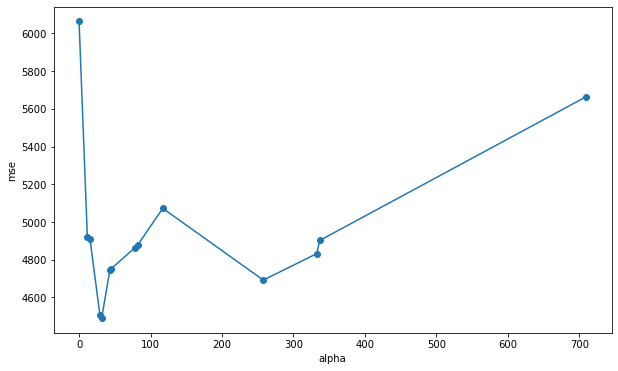

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("mse")
ax.plot(ccp_alphas, dt_mses, marker="o", label="train")
plt.show()

In [41]:
min_mse = np.min(dt_mses)
min_alpha = ccp_alphas[np.where(dt_mses==min_mse)]

dec_pruning = DecisionTreeRegressor(random_state=0, ccp_alpha=min_alpha)
dec_pruning.fit(X_train, y_train)
dec_pruning_pred = dec_pruning.predict(X_test)

In [42]:
mean_squared_error(y_test, dec_pruning_pred)

4134.318047423683

In [43]:
r2_score(y_test, dec_pruning_pred)

0.23956346457335298